## Investigations

This is a notebook for working with data collected during production runs. The data is read in from .csv files that can be generated from raw data using the "analysis_and_plotting.py" script. This notebook must be in the same directory as the rest of the BGLNCSexplorer scripts.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import visualization

# for nicer plots, optional:
from matplotlib import rc

# for nicer plots, optional (uncomment the following two lines for LaTeX in plots):
rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# Set figure sizes
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

Below we set up the paths and read in the data to DataFrames:

In [2]:
wrkdir = os.getcwd()
path_to_csv = os.path.join(os.path.dirname(wrkdir), "Result_data")

df = pd.read_csv(os.path.join(path_to_csv, "total_data_good_points.csv"))
df_f = pd.read_csv(os.path.join(path_to_csv, "total_data_mixed_points.csv"))

#print(wrkdir, os.path.dirname(wrkdir))
#print(df.head())

Below, we create an instance of the visualization class. This class is used to make publication-quality plots and can also be used to make some fancy, pre-programmed plots here.

In [3]:
vis = visualization.Visualization()

<Figure size 432x288 with 0 Axes>

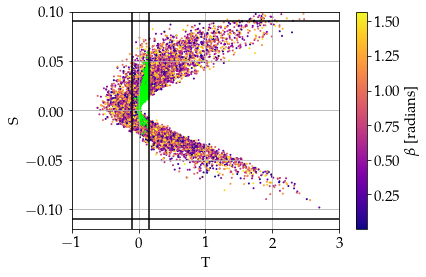

<Figure size 432x288 with 0 Axes>

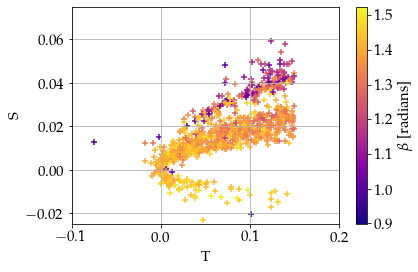

<Figure size 432x288 with 0 Axes>

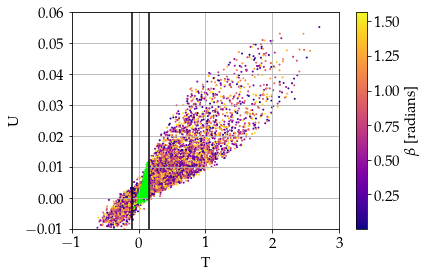

<Figure size 432x288 with 0 Axes>

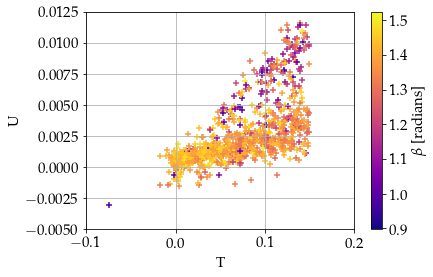

<Figure size 432x288 with 0 Axes>

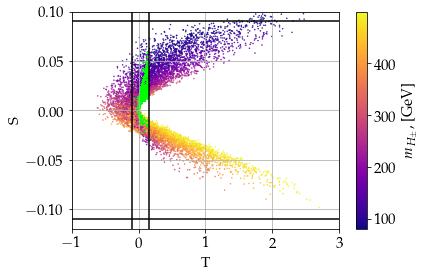

<Figure size 432x288 with 0 Axes>

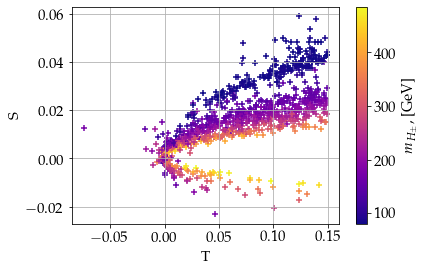

<Figure size 432x288 with 0 Axes>

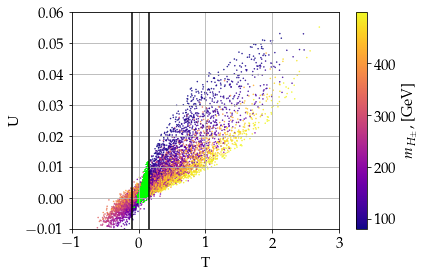

<Figure size 432x288 with 0 Axes>

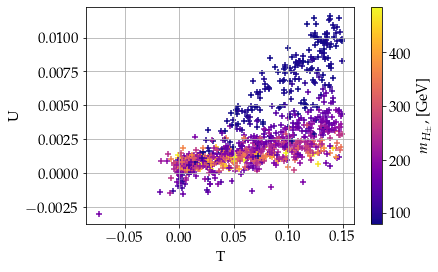

<Figure size 432x288 with 0 Axes>

In [18]:
vis.stu_plotter(df.S_p, df.T_p, df.U_p, df.beta, df.mHPlus, df_f.S, df_f["T"],
                df_f.U, df_f.beta, df_f.mHPlus)

In [4]:
print(df.columns, "\n", df_f.columns)

Index(['Unnamed: 0', 'mH', 'mS', 'mA', 'mChi', 'mHPlus', 'S', 'T', 'U', 'S_p',
       'T_p', 'U_p', 'v1', 'v2', 'beta', 'delta2', 'delta3', 'BXsgammaRatio',
       'BRB0eeRatio', 'BRKPLuspinunuRatio', 'BXB0mumuRatio', 'BRBsmumuRatio',
       'EpsilonKRatio', 'DeltaMdRatio', 'DeltaMsRatio'],
      dtype='object') 
 Index(['Unnamed: 0', 'mH', 'mS', 'mA', 'mChi', 'mHPlus', 'S', 'T', 'U', 'v1',
       'v2', 'beta', 'delta2', 'delta3'],
      dtype='object')


In [5]:
print(df_f["T"])

0       -0.337393
1        0.030366
2        0.018528
3        0.652724
4        0.011287
           ...   
9996     1.014365
9997     0.033664
9998     0.479379
9999    -0.003552
10000    0.782290
Name: T, Length: 10001, dtype: float64


Below we investigate how the STU values computed by us compare to those computed by SPheno. From the above plots we know that the only oblique parameter that is important is T. Below we can see that our calculations essentially always overestimate T so we are always "safe".

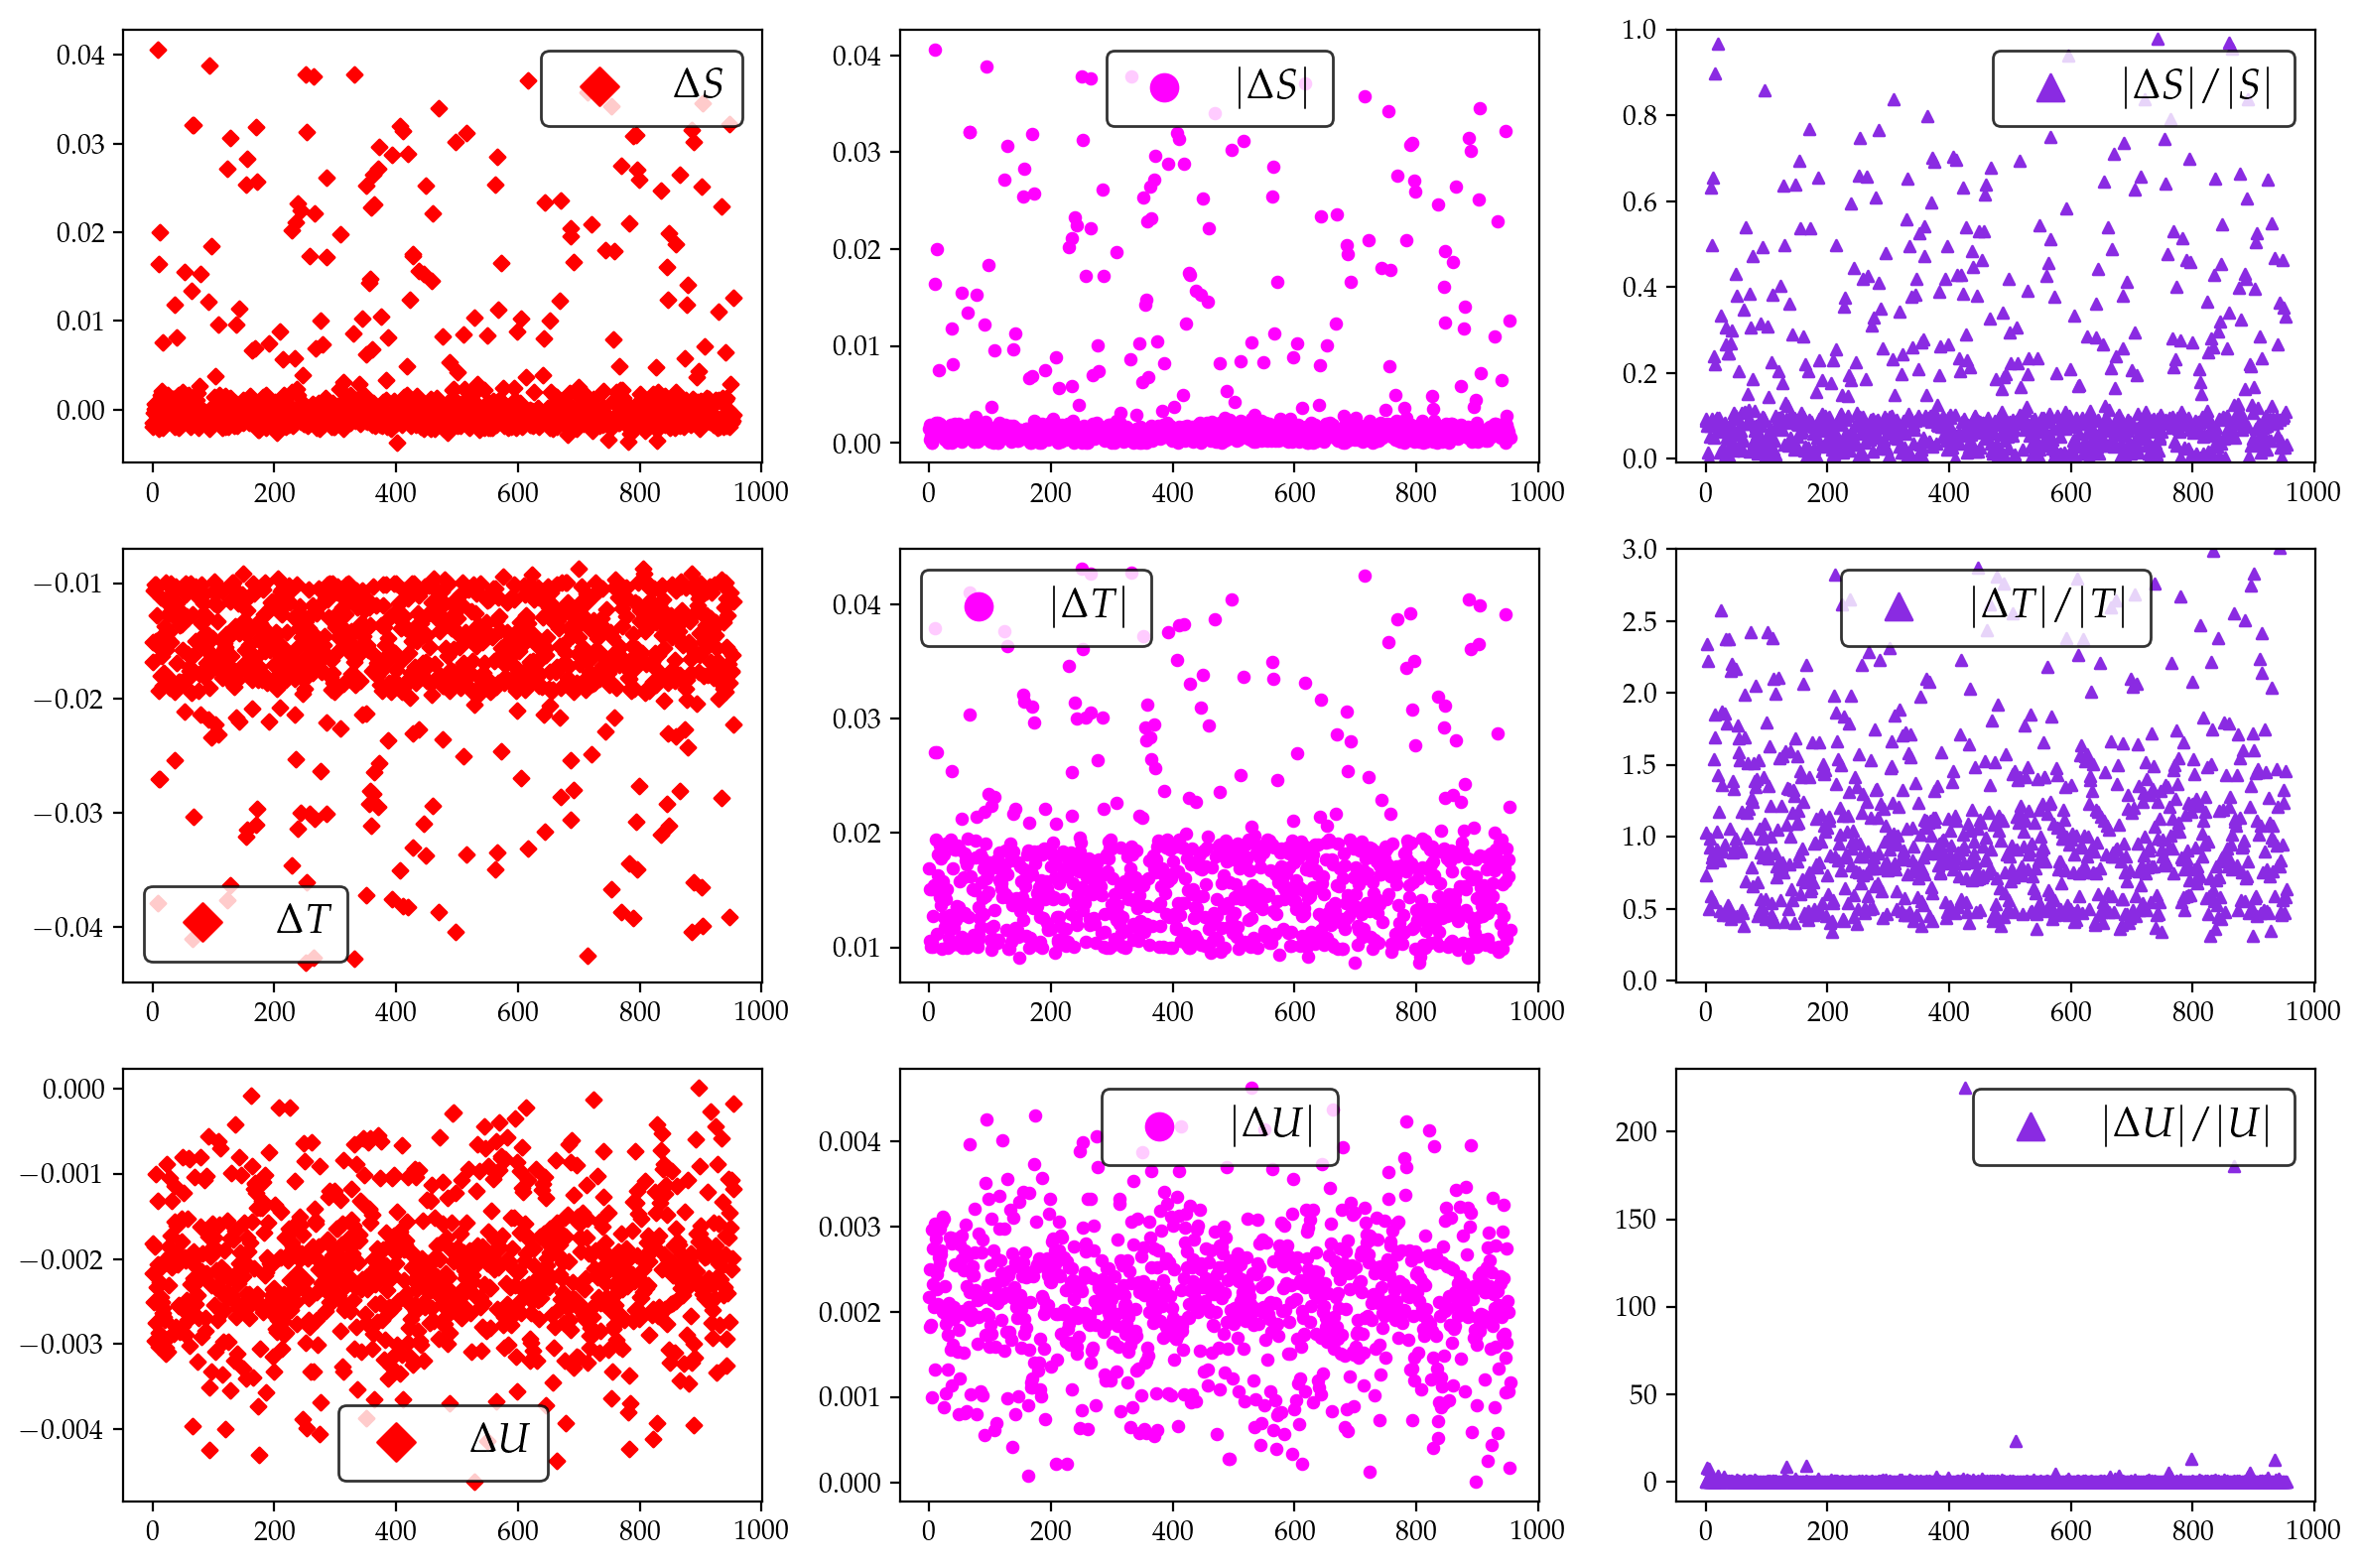

In [63]:
#print(df["S"] - df["S_p"])
fig, ax = plt.subplots(3, 3)

differences = ax[0,0].scatter(df.index, df["S"] - df["S_p"], label = "$\Delta S$", c = 'red', marker = 'D', s = 15)
abs_differences = ax[0,1].scatter(df.index, abs(df["S"] - df["S_p"]), label = "$|\Delta S|$", c = 'magenta', marker = 'o', s = 15)
diff_by_magnitude = ax[0,2].scatter(df.index, abs(df["S"] - df["S_p"])/abs(df["S"]), label = "$|\Delta S|/|S|$", c = 'blueviolet',
                                 marker = '^', s = 15)
ax[0,2].set_ylim(bottom = -0.01, top = 1)


differences = ax[1,0].scatter(df.index, df["T"] - df["T_p"], label = "$\Delta T$", c = 'red', marker = 'D', s = 15)
abs_differences = ax[1,1].scatter(df.index, abs(df["T"] - df["T_p"]), label = "$|\Delta T|$", c = 'magenta', marker = 'o', s = 15)
diff_by_magnitude = ax[1,2].scatter(df.index, abs(df["T"] - df["T_p"])/abs(df["S"]), label = "$|\Delta T|/|T|$", c = 'blueviolet',
                                 marker = '^', s = 15)
ax[1,2].set_ylim(bottom = -0.01, top = 3)

differences = ax[2,0].scatter(df.index, df["U"] - df["U_p"], label = "$\Delta U$", c = 'red', marker = 'D', s = 15)
abs_differences = ax[2,1].scatter(df.index, abs(df["U"] - df["U_p"]), label = "$|\Delta U|$", c = 'magenta', marker = 'o', s = 15)
diff_by_magnitude = ax[2,2].scatter(df.index, abs(df["U"] - df["U_p"])/abs(df["S"]), label = "$|\Delta U|/|U|$", c = 'blueviolet',
                                 marker = '^', s = 15)
#ax[2].set_ylim(bottom = -0.01, top = 1)

for i in range(3):
    for j in range(3):
        ax[i,j].legend(prop = {'size' : 15}, markerscale = 2.5, edgecolor = 'black')

#fig.legend(prop = {'size' : 15}, markerscale = 2.5, edgecolor = 'black')
fig.tight_layout()
plt.show()

Do the STU parameters that SPheno calculates result in more stringent exclusion? No, as the below code show (only 1 in 955 points excluded by also chacking SPheno STU):

In [20]:
print(df.loc[(df["T"] > -0.09) & (df["T"] < 0.15) & (df["S"] > -0.11) & (df["S"] < 0.09) & (df["U"] > -0.09) &
             (df["U"] < 0.13)].shape[0])

954


In [69]:
print(np.random.uniform(-0,0))

0.0


In [76]:
data = [['c', 1], ['d', 2]]
df_tmp2 = pd.DataFrame([[1,2],[3,4]], columns = ['value1', 'value2'])
df_tmp3 = pd.DataFrame([[6,2],[5,4]], columns = ['value1', 'value2'])
df_tmp = pd.DataFrame(data, columns = ['name', 'value'])
print(pd.concat([df_tmp, df_tmp2, df_tmp3], axis = 1))
print(df_tmp, '\n',df_tmp2)

  name  value  value1  value2  value1  value2
0    c      1       1       2       6       2
1    d      2       3       4       5       4
  name  value
0    c      1
1    d      2 
    value1  value2
0       1       2
1       3       4
